## 2. Time series with Statsmodels

### 1.Hodrick-Prescott filter
- time series를 trend와 cyclical component로 나눈다.

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline

df = pd.read_csv('Data/macrodata.csv',index_col=0,parse_dates=True)
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


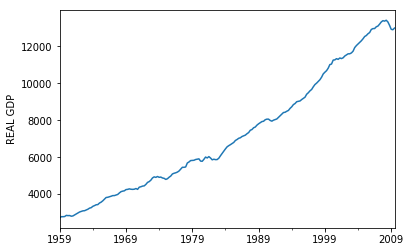

In [3]:
ax = df['realgdp'].plot()
ax.autoscale(axis='x',tight=True)
ax.set(ylabel='REAL GDP');

In [4]:
from statsmodels.tsa.filters.hp_filter import hpfilter

# Tuple unpacking
gdp_cycle, gdp_trend = hpfilter(df['realgdp'], lamb=1600)

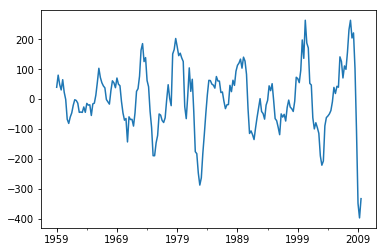

In [6]:
gdp_cycle.plot();

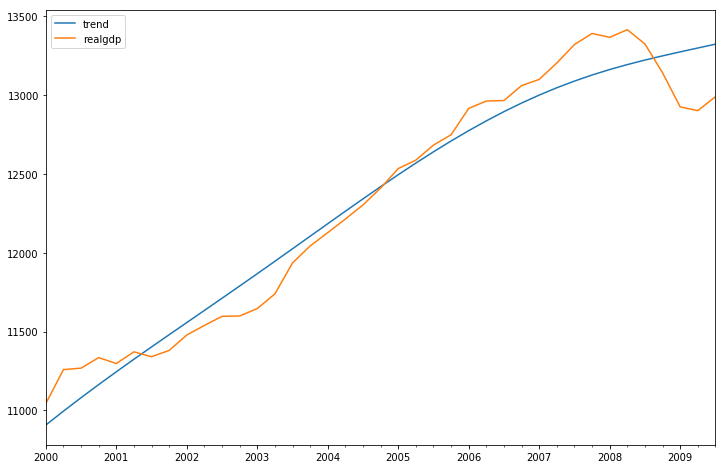

In [7]:
df['trend'] = gdp_trend
df[['trend','realgdp']]['2000-03-31':].plot(figsize=(12,8)).autoscale(axis='x',tight=True);

### 3. ETS (Error , Trend, Seasonality) decomposition

- Seasonal  
We apply an additive model when it seems that the trend is more linear and the seasonality and trend components seem to be constant over time (e.g. every year we add 10,000 passengers).
A multiplicative model is more appropriate when we are increasing (or decreasing) at a non-linear rate (e.g. each year we double the amount of passengers).

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

airline = pd.read_csv('Data/airline_passengers.csv',index_col='Month',parse_dates=True)
airline.dropna(inplace=True)

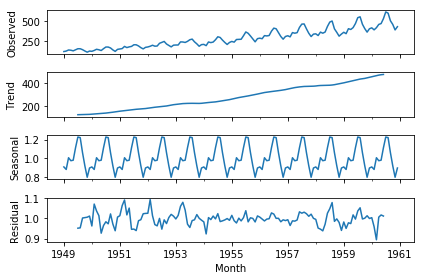

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(airline['Thousands of Passengers'], model = 'mul')
result.plot();

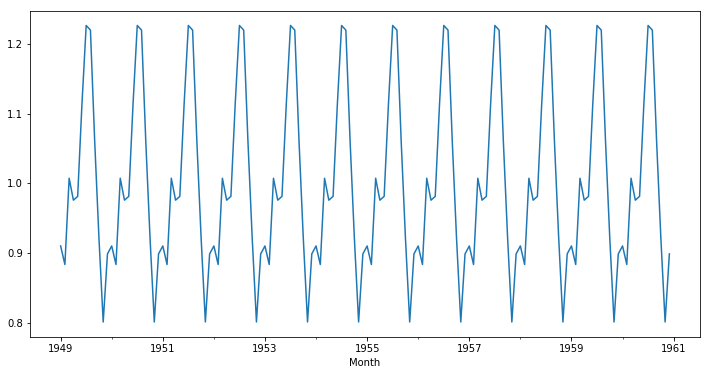

In [16]:
result.seasonal.plot(figsize = (12,6));

### 4. Moving average
- simple moving average 
- exponentially weighted moving average 

In [17]:
import pandas as pd
import numpy as np
%matplotlib inline

airline = pd.read_csv('Data/airline_passengers.csv',index_col='Month',parse_dates=True)
airline.dropna(inplace=True)

- simple

In [18]:
airline['12-month-SMA'] = airline['Thousands of Passengers'].rolling(window=12).mean()

- exponentially weighted moving average

In [19]:
airline['EWMA12'] = airline['Thousands of Passengers'].ewm(span=12,adjust=False).mean()

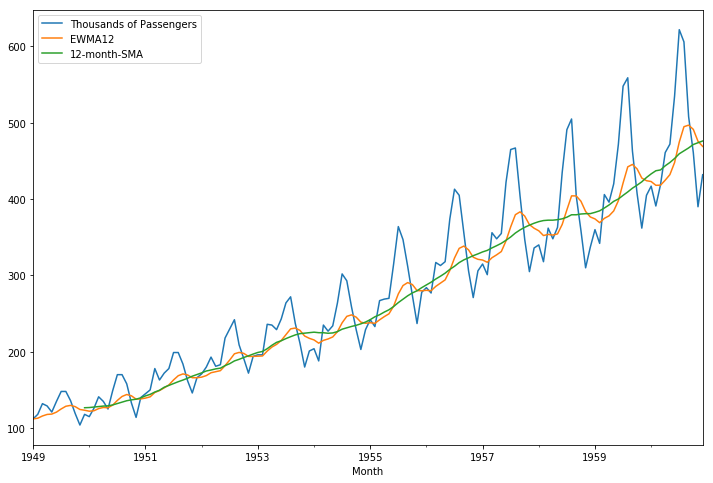

In [20]:
airline[['Thousands of Passengers','EWMA12','12-month-SMA']].plot(figsize=(12,8)).autoscale(axis='x',tight=True);

### 5. Holt-Winters methods
- double exponential smoothing
- triple exponential smoothing

addtive : time series displays a straight-line sloped trend  
multiplicative : time series displays an exponential (curved) trend

In [21]:
import pandas as pd
import numpy as np
%matplotlib inline

df = pd.read_csv('Data/airline_passengers.csv',index_col='Month',parse_dates=True)
df.dropna(inplace=True)
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [22]:
# Setting Datetimeindex freq
# Holt-winters smoothing 방법을 사용하기 위해서는 적절한 freq를 지정해야함
# 이 데이터는 monthly data라서 MS
df.index.freq = 'MS'
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

- simple exponetial smoothing:  
단순지수평활법이 위에서 본 ewm과 같은 것이다.

In [23]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

span = 12
alpha = 2/(span+1)

df['EWMA12'] = df['Thousands of Passengers'].ewm(alpha=alpha,adjust=False).mean()
df['SES12']=SimpleExpSmoothing(df['Thousands of Passengers']).fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1)
df.head()

,Thousands of Passengers,EWMA12,SES12
Month,,,
1949-01-01,112,112.000000,112.000000
1949-02-01,118,112.923077,112.923077
1949-03-01,132,115.857988,115.857988
1949-04-01,129,117.879836,117.879836
1949-05-01,121,118.359861,118.359861


- double exponential smoothing  

In [26]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [27]:
df['DESadd12'] = ExponentialSmoothing(df['Thousands of Passengers'], trend='add').fit().fittedvalues.shift(-1)
df.head()

,Thousands of Passengers,EWMA12,SES12,DESadd12
Month,,,,
1949-01-01,112,112.000000,112.000000,114.336425
1949-02-01,118,112.923077,112.923077,120.336425
1949-03-01,132,115.857988,115.857988,134.336425
1949-04-01,129,117.879836,117.879836,131.336425
1949-05-01,121,118.359861,118.359861,123.336425


In [28]:
df['DESmul12'] = ExponentialSmoothing(df['Thousands of Passengers'], trend='mul').fit().fittedvalues.shift(-1)
df.head()

,Thousands of Passengers,EWMA12,SES12,DESadd12,DESmul12
Month,,,,,
1949-01-01,112,112.000000,112.000000,114.336425,112.049247
1949-02-01,118,112.923077,112.923077,120.336425,118.051885
1949-03-01,132,115.857988,115.857988,134.336425,132.058041
1949-04-01,129,117.879836,117.879836,131.336425,129.056722
1949-05-01,121,118.359861,118.359861,123.336425,121.053204


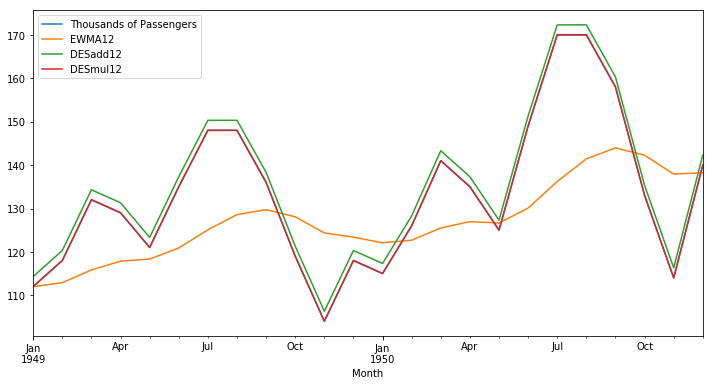

In [30]:
df[['Thousands of Passengers','EWMA12','DESadd12','DESmul12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

- triple exponential smoothing:  
trend, seasonality 가 모두 있을 때

In [32]:
df['TESadd12'] = ExponentialSmoothing(df['Thousands of Passengers']
                                      ,trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
df.head()

,Thousands of Passengers,EWMA12,SES12,DESadd12,DESmul12,TESadd12
Month,,,,,,
1949-01-01,112,112.000000,112.000000,114.336425,112.049247,113.081280
1949-02-01,118,112.923077,112.923077,120.336425,118.051885,120.550734
1949-03-01,132,115.857988,115.857988,134.336425,132.058041,135.527379
1949-04-01,129,117.879836,117.879836,131.336425,129.056722,133.155135
1949-05-01,121,118.359861,118.359861,123.336425,121.053204,125.656213


In [33]:
df['TESmul12'] = ExponentialSmoothing(df['Thousands of Passengers']
                                      ,trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
df.head()

,Thousands of Passengers,EWMA12,SES12,DESadd12,DESmul12,TESadd12,TESmul12
Month,,,,,,,
1949-01-01,112,112.000000,112.000000,114.336425,112.049247,113.081280,111.602246
1949-02-01,118,112.923077,112.923077,120.336425,118.051885,120.550734,118.847096
1949-03-01,132,115.857988,115.857988,134.336425,132.058041,135.527379,133.336934
1949-04-01,129,117.879836,117.879836,131.336425,129.056722,133.155135,127.906818
1949-05-01,121,118.359861,118.359861,123.336425,121.053204,125.656213,120.986688


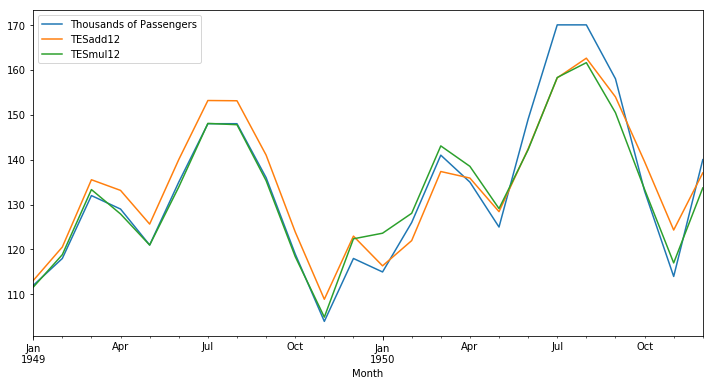

In [34]:
df[['Thousands of Passengers','TESadd12','TESmul12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);